# Uptake of carbon

Plotting a global map of carbon uptake

In [2]:
%matplotlib inline

import xarray as xr
import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


In [3]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")

pangeo-cmip6-ESM Collection with 28660 entries:
	> 10 activity_id(s)

	> 23 institution_id(s)

	> 48 source_id(s)

	> 29 experiment_id(s)

	> 86 member_id(s)

	> 23 table_id(s)

	> 190 variable_id(s)

	> 7 grid_label(s)

	> 28660 zstore(s)

	> 59 dcpp_init_year(s)

`intake-esm` is build on top of [pandas](https://pandas.pydata.org/pandas-docs/stable). It is possible to view the `pandas.DataFrame` as follows.

In [7]:
cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Oyr', variable_id='dissic', grid_label='gn')
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1475,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1544,CMIP,CCCma,CanESM5,historical,r10i1p2f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1614,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r11i1...,NaN
1710,CMIP,CCCma,CanESM5,historical,r12i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN
1806,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r13i1...,NaN
1903,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r14i1...,NaN
1999,CMIP,CCCma,CanESM5,historical,r15i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r15i1...,NaN
2095,CMIP,CCCma,CanESM5,historical,r16i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r16i1...,NaN
2191,CMIP,CCCma,CanESM5,historical,r17i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r17i1...,NaN
2288,CMIP,CCCma,CanESM5,historical,r18i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r18i1...,NaN


In [8]:
models = set(uni_dict['source_id']['values']) # all the models

for experiment_id in ['historical', 'ssp585']:
    query = dict(experiment_id=experiment_id, table_id='Oyr', 
                 variable_id='dissic', grid_label='gn')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# for oxygen, ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
# models = models - {'CESM2-WACCM', 'CESM2'}

models = list(models)
models

['CanESM5', 'IPSL-CM6A-LR', 'MIROC-ES2L']

In [9]:
cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Oyr', 
                 variable_id='dissic', grid_label='gn', source_id=models)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1475,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1544,CMIP,CCCma,CanESM5,historical,r10i1p2f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1614,CMIP,CCCma,CanESM5,historical,r11i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r11i1...,NaN
1710,CMIP,CCCma,CanESM5,historical,r12i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r12i1...,NaN
1806,CMIP,CCCma,CanESM5,historical,r13i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r13i1...,NaN
1903,CMIP,CCCma,CanESM5,historical,r14i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r14i1...,NaN
1999,CMIP,CCCma,CanESM5,historical,r15i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r15i1...,NaN
2095,CMIP,CCCma,CanESM5,historical,r16i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r16i1...,NaN
2191,CMIP,CCCma,CanESM5,historical,r17i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r17i1...,NaN
2288,CMIP,CCCma,CanESM5,historical,r18i1p1f1,Oyr,dissic,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r18i1...,NaN


### Loading data

`intake-esm` enables loading data directly into an [xarray.Dataset](http://xarray.pydata.org/en/stable/api.html#dataset).

Note that data on the cloud are in 
[zarr](https://zarr.readthedocs.io/en/stable/) format and data on 
[glade](https://www2.cisl.ucar.edu/resources/storage-and-file-systems/glade-file-spaces) are stored as 
[netCDF](https://www.unidata.ucar.edu/software/netcdf/) files. This is opaque to the user.

`intake-esm` has rules for aggegating datasets; these rules are defined in the collection-specification file.

In [44]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {'time' : 20}, 'decode_times': False})

`dset_dict` is a dictionary of `xarray.Dataset`'s; its keys are constructed to refer to compatible groups.

In [45]:
dset_dict.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Oyr.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Oyr.gn', 'ScenarioMIP.CCCma.CanESM5.ssp585.Oyr.gn', 'ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.Oyr.gn'])

We can access a particular dataset as follows.

In [12]:
dsC = dset_dict['CMIP.CCCma.CanESM5.historical.Oyr.gn']

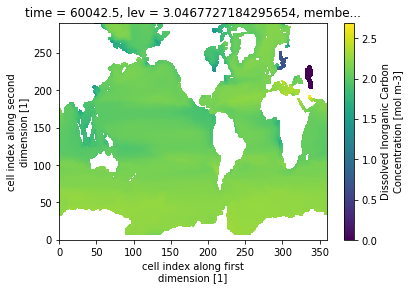

In [13]:
dsC.dissic.isel(member_id = 0,time=164,lev=0).plot()

In [14]:
cat_fx = col.search(experiment_id=['historical', 'ssp585'], source_id=models, table_id='Ofx', grid_label='gn')
cat_fx.df
cat_fx.df.drop_duplicates(subset=['source_id', 'variable_id'], inplace=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
cat_fx.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
1435,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1436,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,deptho,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1437,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,sftof,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
1438,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Ofx,thkcello,gn,gs://cmip6/CMIP/CCCma/CanESM5/historical/r10i1...,NaN
6515,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Ofx,areacello,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
6516,CMIP,IPSL,IPSL-CM6A-LR,historical,r10i1p1f1,Ofx,basin,gn,gs://cmip6/CMIP/IPSL/IPSL-CM6A-LR/historical/r...,NaN
9232,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN
9233,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Ofx,deptho,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN
9234,CMIP,MIROC,MIROC-ES2L,historical,r1i1p1f2,Ofx,sftof,gn,gs://cmip6/CMIP/MIROC/MIROC-ES2L/historical/r1...,NaN


In [16]:
dset_dict = cat_fx.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {}, 'decode_times': False})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 3 group(s)


In [17]:
ds_fx = dset_dict['CMIP.CCCma.CanESM5.historical.Ofx.gn']

In [34]:
import numpy as np
import matplotlib.pyplot as plt
#fig, axes = plt.subplots(ncols=7,nrows=5)
DICstore = 0
for i in np.arange(35):
    tmp = (dsC.dissic.isel(member_id=i,time=(164-np.arange(10))).mean('time')*ds_fx.thkcello.isel(member_id=0)-dsC.dissic.isel(member_id=i,time=np.arange(10)).mean('time')*ds_fx.thkcello.isel(member_id=0)).sum('lev')
    DICstore = DICstore+tmp
DICstore = DICstore/35

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


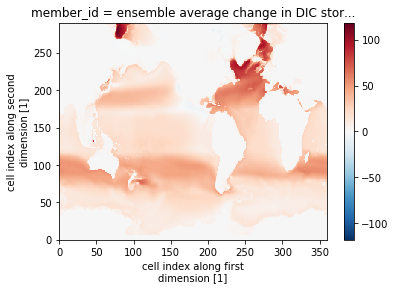

In [42]:
DICstore['member_id'] = 'ensemble average change in DIC storage (mol/m^2) 1850 to 2015'
DICstore.plot()

In [57]:
DICsurf = 0
for i in np.arange(35):
    tmp = (dsC.dissic.isel(member_id=i,lev = 0,time=(164-np.arange(10))).mean('time')-dsC.dissic.isel(member_id=i,lev = 0,time=np.arange(10)).mean('time'))
    DICsurf = DICsurf+tmp
DICsurf = DICsurf/35

/srv/conda/envs/notebook/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


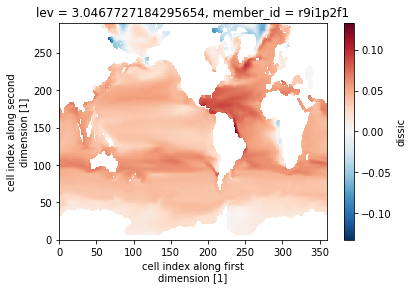

In [58]:
DICsurf.plot()